# Atividade: Regressão Linear

Enunciado:

1. Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;
2. Treine um modelo da classe LinearRegression do scikit-learn com toda a base;
3. Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;
4. Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. 
Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

## Base de Dados
Para a atividade será utilizada a base de dados Fish market que possui o registro de 7 espécies diferentes de peixes comuns nas vendas do mercado de peixes. A partir dos atributos deseja-se estimar o peso dos peixes.

![image](../img/dataset-cover-fish.jpg)

### Dicionário de dados:

**Species:** species name of fish

**Weight:** weight of fish in Gram g

**Length1:** vertical length in cm

**Length2:** diagonal length in cm

**Length3:** cross length in cm

**Height:** height in cm

**Width:** diagonal width in cm

Fonte: https://www.kaggle.com/aungpyaeap/fish-market

## Leitura dos Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Leitura do arquivo csv
df = pd.read_csv("../datasets/fish-market-dataset.csv")
# Renomeia coluna
df = df.rename(columns={"Length 1":"Length1"})
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Análise de valores nulos e estatísticas sobre os dados

In [4]:
# Verificação do tipo de dado e se existem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
# Algumas estatísticas sobre a base de dados
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Análise de correlação dos atributos numéricos

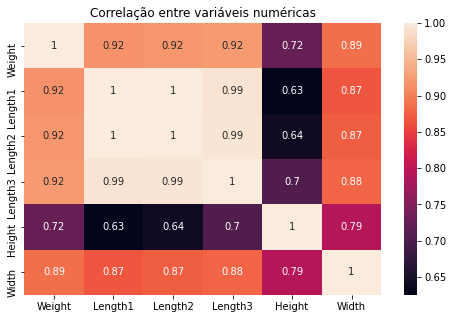

In [6]:
# Análise de correlação de Pearson
corr = df.corr()

plt.figure(figsize=(8,5))
plt.title("Correlação entre variáveis numéricas")
sns.heatmap(corr, annot=True)
plt.show()

Os atributos **Lenght1**, **Lenght2** e **Lenght3** são altamente correlacionados e para evitar o problema de multicolinearidade, que impacta na performance do modelo, não devem ser utilizados em conjunto. Observe que o atributo **weight** (a ser predito) possui alta correlação com o atributo **Lenght1** que será escolhido para estimar os pesos dos peixes.

## Utilização de Regressão Linear Univariável

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ajusta formato dos dados
y = df['Weight'].values.reshape(-1,1)
X = df['Length1'].values.reshape(-1,1)
# Treina modelo
reg = LinearRegression().fit(X, y)

# Obtém coeficiente de determinação R2 
r2_score = reg.score(X, y)
# Obtém coeficiente da reta
coef = reg.coef_
# Obtém o intercept (valor onde reta toca no eixo y)
intercept = reg.intercept_
# Obtém predições
y_pred = reg.predict(X)
# Calcula o MSE (Mean Squared Error)
mse = mean_squared_error(y, y_pred)

In [8]:
pd.DataFrame({"R2 Score": r2_score, "Coef. da Reta": coef.item(), "Intercept": intercept, "MSE": mse})

,R2 Score,Coef. da Reta,Intercept,MSE
0,0.838528,32.792164,-462.375079,20562.256518


In [9]:
# valor real e previsto
df_preds = pd.DataFrame({'X': X.flatten(), 'y': y.flatten(), 'y_pred': y_pred.flatten()})
df_preds.head()

,X,y,y_pred
0,23.2,242.0,298.403123
1,24.0,290.0,324.636854
2,23.9,340.0,321.357638
3,26.3,363.0,400.058831
4,26.5,430.0,406.617264


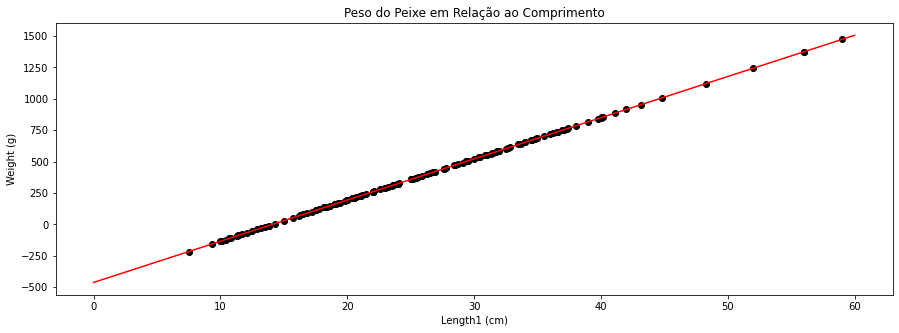

In [10]:
# Gráfico que mostra a reta obtida a partir do modelo
def plot_regressao():
    p = np.linspace(start=0,stop=60,num=61)
    preds = [i * coef + intercept for i in p]
    preds = np.array(preds).reshape(-1,1)
    plt.figure(figsize=(15,5))
    ax = plt.axes()
    ax.scatter(df_preds["X"], df_preds["y_pred"], color='black')
    ax.plot(p, preds, color='r')
    plt.title("Peso do Peixe em Relação ao Comprimento")
    plt.xlabel("Length1 (cm)")
    plt.ylabel("Weight (g)")
    plt.show()
    

plot_regressao()

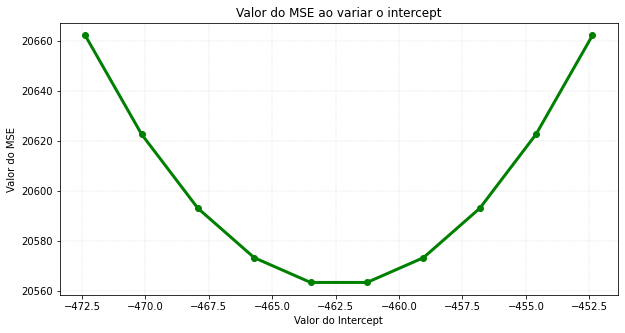

In [11]:
# Função plota o valor do MSE em relação ao valor do intercept
def plot_delta_intercept_mse_score(coef, intercept, X,y):
    list_intercept = []
    list_mse = []
    # Valores a serem somados ou subtraídos ao valor do intercept
    delta = np.linspace(start=-10,stop=10,num=10)
    
    for i in range(len(delta)):
        # Calcula os valores o intercept para um intervalo e salva numa lista
        new_intercept = intercept.item() + delta[i]
        list_intercept.append(new_intercept)
        # Obtém predições para cada ponto do conjunto de dados
        y_pred = [x * coef + new_intercept for x in X]
        y_pred = np.array(y_pred).reshape(-1,1)
        # Calcula o MSE e salva em uma lista
        mse = mean_squared_error(y, y_pred)
        list_mse.append(mse)
    
    # Plota gráfico
    plt.figure(figsize=(10,5))
    plt.title("Valor do MSE ao variar o intercept")
    plt.plot(list_intercept,list_mse, '.-g', linewidth=3, markersize=12) # [marker][line][color]
    plt.xlabel("Valor do Intercept")
    plt.ylabel("Valor do MSE")
    plt.grid(linestyle='--', linewidth=.2)
    
    plt.show()

plot_delta_intercept_mse_score(coef, intercept, X, y)      